In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
import glob

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from PIL import Image
from IPython import display
%matplotlib inline

Upload the data

In [3]:
path = r'D:\Ohio\Data OMD EMD 11.2018\Ex Vivo CSV Files'# os.chdir(path)
os.listdir(path)

['H79_F108.csv_annot.csv_KH.csv',
 'H79_F108.csv_annot.csv_KHOMannotations_KH.xlsx',
 'H79_F125.csv_annot MISSING H8_OM_KH.csv',
 'H81_F158.csv_annot_KH.csv',
 'H81_F171.csv_annot.csv',
 'H82_F111.csv_annotOM_KH.csv',
 'H96_F61.csv_annot.csv',
 'H96_F88.csv_annot.csv']

In [4]:
data_list = []
for filename in glob.glob(os.path.join(path, '*.csv')):
    data = pd.read_csv(filename, header=0)
    print(data.shape)
    data_list.append(data)

(8270, 384)
(8775, 384)
(8138, 384)
(10173, 384)
(10173, 384)
(8138, 384)
(8138, 384)


Split to three classes, electrode

In [5]:
drivers = []
nondrivers = []
noises = []

for df in data_list:
    driver = pd.DataFrame()
    nondriver = pd.DataFrame()
    noise = pd.DataFrame()
    for col in df.columns[1::3]:
        curr_index = list(df.columns).index(col)
        prev_index = curr_index - 1
        next_index = curr_index + 1
        prev_col = df.iloc[:,prev_index]
        next_col = df.iloc[:,next_index]
        if df[col][0] == 1:
            driver[df.columns[prev_index]] = prev_col
            driver[df.columns[next_index]] = next_col
        elif df[col][0] == 0:
            nondriver[df.columns[prev_index]] = prev_col
            nondriver[df.columns[next_index]] = next_col
        elif df[col][0] == -1:
            noise[df.columns[prev_index]] = prev_col
            noise[df.columns[next_index]] = next_col
    drivers.append(driver)
    nondrivers.append(nondriver)
    noises.append(noise)

# Fourier transform

Fourier transfom for all electrode data

In [23]:
for k, df in enumerate(drivers):
    electrode_signal = df[df.columns[::2]]

    y = []
    for i in range(electrode_signal.shape[1]):
        y_ = electrode_signal.iloc[:, i]
        y.append(y_)

    N = df.shape[0] # Number of sample points
    Fs = 1017.25 # sampling rate
    T = 1.0/Fs # sampling interval

    yf =[]
    xf=[]
    for j in range(len(y)):
        yf_ =  np.fft.fft(y[j])
        yf.append(yf_)
        xf_ = np.fft.rfftfreq(N, 1./Fs)
        xf.append(xf_)
        print(np.argwhere(xf_>20)[0]) # Index of 20 Hz


[163]
[163]
[163]
[163]
[163]
[173]
[173]
[173]
[173]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[201]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]
[160]


Фурье спектр электродных данных

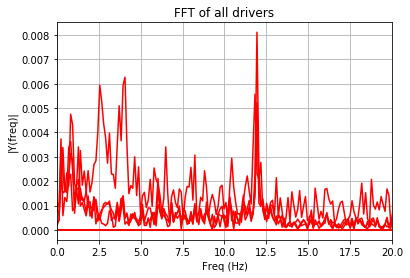

In [32]:
for i in [1]:
    for j in range(drivers[i].shape[1] // 2):
        
        N = drivers[i].shape[0] # Number of sample points
        Fs = 1017.25 # sampling rate
        T = 1.0/Fs # sampling interval

        electrode_signal = drivers[i][drivers[i].columns[::2]]
        
        y = []
        for k in range(electrode_signal.shape[1]):
            y_ = electrode_signal.iloc[:, k]
            y.append(y_)

    
        yf =[]
        xf=[]
        for n in range(len(y)):
            yf_ =  np.fft.fft(y[j])
            yf.append(yf_)
            xf_ = np.fft.fftfreq(N, 1./Fs)
            xf.append(xf_)

        plt.plot(xf[i], np.abs(yf[i])/N, color='r')
        plt.xlim(0,20)
        #plt.ylim(0, 0.15)
        plt.grid(True)
        plt.xlabel('Freq (Hz)')
        plt.ylabel('|Y(freq)|')
        plt.title('FFT of all drivers')
plt.savefig(path + '\Full FFT 1 drivers EM  ' + '.png')
plt.show()